In [1]:
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
import sympy
import itertools
import pandas as pd

In [37]:
#Table 1 Case 26: pq=a^2+b^4
#negative value of "a" makes no sense here
primes=sympy.primerange(3, 7000)
for pair in itertools.combinations(primes, 2):
    p=pair[0]
    q=pair[1]
    res = []
    for a in range(1,1000):
        for b in range(1,10):
            if p*q == a*a+b*b*b*b:
                res.append([p,q,a,b])
    if len(res) > 2:
        print(res)
    



[[73, 89, 49, 8], [73, 89, 64, 7], [73, 89, 79, 4]]


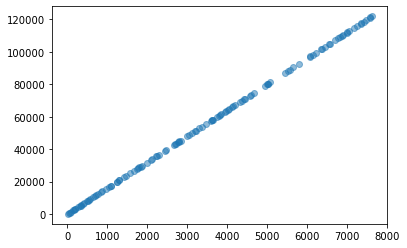

In [25]:
#Table 1 Case 17: q=a^2+pb^4
#fix a=1 b=2 and a=2 b=1
a=1
b=2
pq_pairs=[]
for p in sympy.primerange(3, 7919):
    q=a*a+p*b*b*b*b
    if sympy.isprime(q):
        pq_pairs.append((p,q))

p_list, q_list = zip(*pq_pairs)
plt.scatter(p_list, q_list, alpha=0.5)
plt.show()

In [13]:
def ec_1(x):
    return x**3 - 21*x

def ec_2(x):
    return x**3 - 15*x

def ec_3(x):
    return x**3 - 65*x

def ec_4(x):
    return x**3 - 69*x

#Find the least number to be added to get a perfect square
#https://www.geeksforgeeks.org/least-number-to-be-added-to-or-subtracted-from-n-to-make-it-a-perfect-square/
def nearest(n):
    prevSquare = int(math.sqrt(n))
    nextSquare = prevSquare + 1
    prevSquare = prevSquare * prevSquare
    nextSquare = nextSquare * nextSquare
    return nextSquare - n

#https://www.geeksforgeeks.org/fraction-module-python/
def find_rational_point(p, q, max_iter):
    for a in range(max_iter):
        D=a**4/4+p*q
        sqrtD = math.sqrt(D)
        if sqrtD.is_integer():
            x1 = a**2/2 + math.sqrt(D)
            y1 = a*x1
            x2 = a**2/2 - math.sqrt(D)
            y2 = a*x2
            return [(x1, y1), (x2, y2), a, D]
    return None

def find_rational_point2(p:int, q:int, max_iter:int):
    for a in range(max_iter):
        D=a**4+4*p*q
        sqrtD = math.isqrt(D)
        if sqrtD*sqrtD == D:
            sqrtD /= 2
            x1 = a**2/2 + sqrtD
            y1 = a*x1
            x2 = a**2/2 - sqrtD
            y2 = a*x2
            return [(x1, y1), (x2, y2), a, D]
    return None

def calculateProps(p:int,q:int,a:int,b:int):
    c_qrt=a**4+4*p*q*b**4
    c=math.sqrt(c_qrt)
    discriminant=c_qrt/(4*b**4)
    x1=a**2/(2*b**2)+math.sqrt(discriminant)
    x2=a**2/(2*b**2)-math.sqrt(discriminant)
    y1=x1*a/b
    y2=x2*a/b
    return c, discriminant, (x1,y1), (x2,y2)

In [4]:
print(calculateProps(5,13,7,2))
print(calculateProps(7,11,13,2))
print(calculateProps(3,73,5,2))
print(calculateProps(3,7,2,1))

#print(find_rational_point(7,3,100000))
#print(find_rational_point(5,13,100000))
print(find_rational_point(7,11,100000))
#print(find_rational_point2(7,11,3))
print(find_rational_point2(3,5,100000))

print(15+23172**4/4)
print(math.sqrt(15+23172**4/4))

print(268470792*268470792)

(81.0, 102.515625, (16.25, 56.875), (-4.0, -14.0))
(183.0, 523.265625, (44.0, 286.0), (-1.75, -11.375))
(121.0, 228.765625, (18.25, 45.625), (-12.0, -30.0))
(10.0, 25.0, (7.0, 14.0), (-3.0, -6.0))
[(11.0, 22.0), (-7.0, -14.0), 2, 81.0]
None
7.207656615710728e+16
268470792.0
72076566157107264


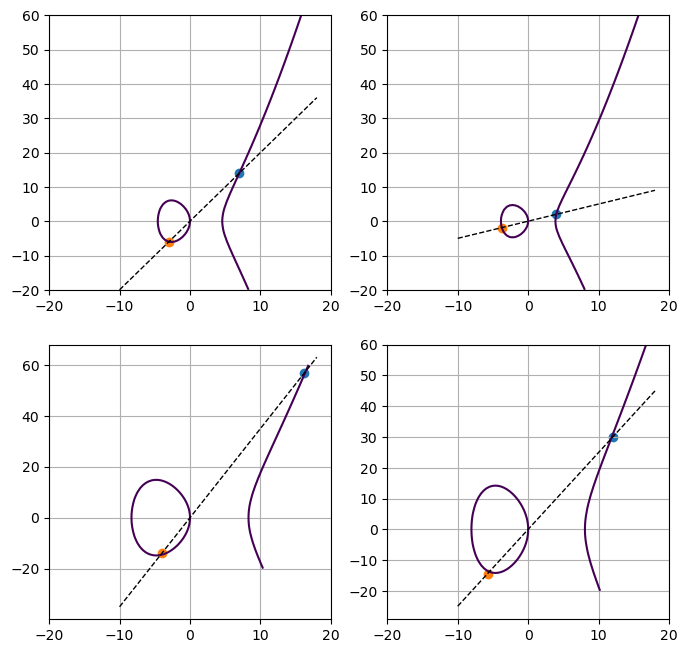

In [30]:
#https://volya.xyz/ecc/
#https://stackoverflow.com/questions/31074172/elliptic-curve-point-addition-over-a-finite-field-in-python
#https://github.com/fangpenlin/elliptic-curve-explained/blob/master/elliptic-curve.ipynb
subplot_size=4
subplot_cols=2
subplot_rows=2

fig, ax = plt.subplots(subplot_rows, subplot_cols, figsize=(subplot_size*subplot_cols,subplot_size*subplot_rows), dpi=100)
ax = ax.flatten()

y, x = np.ogrid[-20:60:100j, -20:20:100j]
t = np.arange(-10, 18, 1)
step=0.001
x_list = [x * step for x in range(int(-10/step), int(18/step))]

ax[0].contour(x.ravel(), y.ravel(), y**2 - ec_1(x), [0])
ax[0].grid()
P=[7,14]
Q=[-3,-6]
ax[0].scatter(*P)
ax[0].scatter(*Q)
slope=(Q[1]-P[1])/(Q[0]-P[0])
y_list = [slope*i for i in x_list]
ax[0].plot(x_list, y_list, linestyle='--', c='black', linewidth=1)

ax[1].contour(x.ravel(), y.ravel(), y**2 - ec_2(x), [0])
ax[1].grid()
P=[4,2]
Q=[-15/4,-15/8]
ax[1].scatter(*P)
ax[1].scatter(*Q)
slope=(Q[1]-P[1])/(Q[0]-P[0])
y_list = [slope*i for i in x_list]
ax[1].plot(x_list, y_list, linestyle='--', c='black', linewidth=1)

ax[2].contour(x.ravel(), y.ravel(), y**2 - ec_3(x), [0])
ax[2].grid()
P=[65/4,455/8]
Q=[-4,-14]
ax[2].scatter(*P)
ax[2].scatter(*Q)
slope=(Q[1]-P[1])/(Q[0]-P[0])
y_list = [slope*i for i in x_list]
ax[2].plot(x_list, y_list, linestyle='--', c='black', linewidth=1)

ax[3].contour(x.ravel(), y.ravel(), y**2 - ec_4(x), [0])
ax[3].grid()
P=[12,30]
Q=[-23/4,-115/8]
ax[3].scatter(*P)
ax[3].scatter(*Q)
slope=(Q[1]-P[1])/(Q[0]-P[0])
y_list = [slope*i for i in x_list]
ax[3].plot(x_list, y_list, linestyle='--', c='black', linewidth=1)

plt.show()


In [10]:
arr=[]
for a in range(1, 2000, 1):
    for b in range(1, 2000, 1):
        if math.gcd(a, b) == 1:
            for p in sympy.primerange(3, 7919):
                nom = p*b-2*a*a
                denom = 4*b*b*b
                q=nom//denom
                if q>p and nom == q*denom and sympy.isprime(q):
                    arr.append([p,q,a,b])

df = pd.DataFrame(arr, columns = ['p', 'q', 'a', 'b'])
#df2=df.groupby(['p', 'q'], axis=0, as_index=True).agg(list)
#df2['cnt'] = [len(c) for c in df2['a']]

df2=df
df2['pq'] = df2['p'] * df2['q']
df2.sort_values(by=['pq'], ascending=True, inplace=True)
df2.to_csv("grouped.csv", index=True)
df2.head(200)

,p,q,a,b,pq


In [80]:
for a in range(1,1000):
    for b in range(1,1000):
        if a*a+b*b == 4241:
            print("{0} {1}".format(a,b))

4 65
65 4
